In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import os
from os import listdir

import cv2
import glob  # for read file from folder

# import the file with the added columns
added_flip_data = pd.read_csv("flipkart_data_combined_cols.csv")

# rearrange the dataframe to have it in the same order as we will have the image file names
df_cats_images = pd.DataFrame(added_flip_data).sort_values(by = "uniq_id")
 
# create a df with one column, with all the image file names
files_df = pd.DataFrame(os.listdir("Images/"), columns = ["name"]).sort_values(by = "name")

df_table = pd.read_csv("df_table.csv")

In [193]:
def make_conf_heat_ver1(ct):
    fig, heat = plt.subplots(figsize = (10,8))
    
    heat = sns.heatmap(ct/ct.to_numpy().sum(axis = 1), annot=True, 
                       fmt='.2%', cmap='Blues', yticklabels = ct.index, xticklabels = ct.columns)

In [194]:
def make_conf_heat_ver2(ct):
    fig, heat = plt.subplots(figsize = (10,8))
    
    heat = sns.heatmap(ct, 
                       annot=True, 
                       fmt='2', cmap='Blues', yticklabels = ct.index, 
                       xticklabels = ct.columns)
    heat.set_xlabel('Predicted Categories', fontsize = 14)
    heat.set_ylabel('Real Categories', fontsize = 14)
    
    for tick in heat.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    
    for tick in heat.yaxis.get_major_ticks():
        tick.label.set_fontsize(12)

In [195]:
from sklearn import manifold, decomposition
from sklearn.manifold import TSNE
import plotly.express as px

def tsne_viz(data, labels, clust_or_class, my_title):
    
    tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', random_state = 6)
    
    X_tsne = tsne.fit_transform(data)
    
    df_tsne = pd.DataFrame(X_tsne[:,0:2], columns = ['tsne1', 'tsne2'])
    
    df_tsne["class"] = df_cats_images["Cat_Level_1"]
    
    df_tsne["cluster"] = labels
    
    print(df_tsne.shape)
    
    fig = px.scatter(
        X_tsne, x = 0, y = 1,
        color = df_tsne[clust_or_class], labels = {'color': clust_or_class}, title = my_title,
        template = "simple_white", width = 800, height = 700)
    
    fig.update_layout(legend=dict(yanchor="top",
                                  y=0.99,
                                  xanchor="right",
                                  x=0.99))
    fig.show()

In [196]:
from sklearn.decomposition import PCA

def pca_viz(data, xaxist, yaxist):
    
    pca_model = PCA(n_components = 2)
    pca_fit = pca_model.fit_transform(data)
    
    var_explained = pca_model.explained_variance_ratio_.sum()
    print(var_explained)

    # Determine explained variance using explained_variance_ration_ attribute
    var_explained_all = pca_model.explained_variance_ratio_

    print( var_explained_all)
    
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #cum_sum_eigenvalues = np.cumsum(var_explained_all)
    
    fig = px.scatter(x = pca_fit[:,0], y = pca_fit[:,1], color = df_cats_images["Cat_Level_1"],
                    width = 800, height = 600, template = "simple_white")
    
    fig.update_layout(xaxis_title = xaxist, 
                      yaxis_title = yaxist,
                      legend=dict(yanchor="top",
                                  y=0.99,
                                  xanchor="right",
                                  x=0.99))
    fig.show()

# Reading In the Image Files

In [197]:
for dirname, _, filenames in os.walk('/Images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [198]:
os.listdir("Images/")

['aa68675f50a0551b8dadb954017a50a1.jpg',
 '037c2402fee39fbc80433935711d1383.jpg',
 '42643c1c9403f67921a18654bcf45ead.jpg',
 '53f4bc7d7321f5c41de6b86e41f13e80.jpg',
 'b144a363c107c7bdd91f32d6e28ba6f2.jpg',
 'db3e2eeb4fe90d4755f2911d661eae95.jpg',
 '9a9402ad55d079c86c302521816b7b0e.jpg',
 '42a8fef62716772c391fbdd148cc9c16.jpg',
 '503bb08f7bdf6a395ec564dd1dc83619.jpg',
 '42770faa04bfcf2b62e7ef335e1b1965.jpg',
 '9c4ab8ab059c912090c83cb0818e7f1c.jpg',
 'f2fa99bfaa4aa65a2bd53337e140f949.jpg',
 'a618354ba17cff64826558d81afc77ab.jpg',
 'c063d07d78a55a21bf6c0e7c8ae46a6d.jpg',
 'e99d9abb115a9bd580bcccf9ff4d4881.jpg',
 '1d829e0eac91d7e85cdd6d581c363360.jpg',
 '5c7b493625b5fc6689cae49d25e1ae17.jpg',
 '06749cbff1487f470438823f6952cfd1.jpg',
 'ab3f4b2d2ec007b7e0eaec213bfdbffc.jpg',
 '473b1ab1abe21826c41efa1584a88a63.jpg',
 '07912328f580cf080d721e6466287896.jpg',
 'e47b9f88b773b3fd97ab3b51642ff6fb.jpg',
 '5cd3d274d71e1e0d6bf075421461b2d5.jpg',
 '7264f56639c8c54158b94ced769082c8.jpg',
 '0991e8d8f88400

In [199]:
# load image in gray scale
# image_query = cv2.imread('image0.png', cv2.IMREAD_GRAYSCALE)

#train_image_list = load_all_image_from_path("Images/*")

In [200]:
def load_all_image_from_path(path):
    image_list = []
    for filename in glob.glob(path):
        im = cv2.imread(filename)
        # Convert the training image to RGB
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        #im = cv2.IMREAD_GRAYSCALE
        image_list.append(im)
    return image_list


# ORB Technique

## Determining the ORB descriptors


In [201]:
import timeit
start_time = timeit.default_timer()

allFeatures=[]

for filename in os.listdir("Images/"):
    # Load photos containing
    #-----Reading the image-----------------------------------------------------
    #img = cv2.imread('Dog.jpg', 1)
    img = cv2.imread("Images/" + filename)
    cv2.imshow("img",img) 
    
    #-----Converting image to LAB Color model----------------------------------- 
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    cv2.imshow("lab",lab)
    
    #-----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)
    cv2.imshow('l_channel', l)
    cv2.imshow('a_channel', a)
    cv2.imshow('b_channel', b)
    
    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    cv2.imshow('CLAHE output', cl)
    
    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    cv2.imshow('limg', limg)
    
    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    cv2.imshow('final', final)
    
    # Convert the training image to RGB
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Convert to grayscale
    #img1 = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
    #img1= cv2.GaussianBlur(img1,(5,5),cv2.BORDER_DEFAULT)
    
    # Apply histogram equalization
    #ll = cv2.equalizeHist(img1)
    
    # Extract image features with help of ORB
    # can add parameter : nfeatures
    orb = cv2.ORB_create()
    
    keypoints, descriptors = orb.detectAndCompute(final, None)
    # Descriptor: (number of descriptors, length of said descriptors) for each image
    print("Descriptors : ", descriptors.shape)
    
    # array[ImageNb][FeatureNb]
    allFeatures.append(descriptors)
    
elapsed = timeit.default_timer() - start_time
executionTimeMin = elapsed / 60


Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (450, 32)
Descriptors :  (500, 32)
Descriptors :  (469, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (483, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (456, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)


Descriptors :  (425, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (8, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (436, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
De

Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (481, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (475, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (420, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)


Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (295, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (452, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (164, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)
Descriptors :  (500, 32)


In [206]:
len(allFeatures)

1050

In [207]:
len(allFeatures[0])

500

In [131]:
print()

print("Temps de traitement ORB descriptor : ", "%15.2f" % elapsed, "secondes")


Temps de traitement ORB descriptor :            80.19 secondes


In [134]:
# descriptors for all images

# numpy.concatenate((a1, a2, ...), axis=0, out=None, dtype=None, casting="same_kind") 
# Join a sequence of arrays along an existing axis.
orb_keypoints_all = np.concatenate(allFeatures, axis = 0)

In [208]:
# number of all descriptors, concatenated 
len(orb_keypoints_all)

516400

In [209]:
# almost 500 descriptors per image but some have a little less
print(500 * 1050)
print((500 * 1050) - 516400)

525000
8600


## Creation of the descriptor clusters 

Use of MiniBatchKMeans to keep the processing time to a minimum 

In [137]:
from sklearn import cluster, metrics

# Determine the number of clusters, to regroup the descriptors that are similar / separate those that 
# are not and not lose too much information

# for this, we can use : sqrt of the total nb of descriptors 
# or we can use: categories * 10 (10 times more than the categories we want)

start_time = timeit.default_timer()

k = int(round(np.sqrt(len(orb_keypoints_all)), 0))
print("SQRT Version of k:", k)
k2 = int(round(np.sqrt(500)))

k3 = 7*10
print("Times 10 Categories, Version of k:", 70)

print("Nombre de clusters estimés : ", k)
print("Création de", k , "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters = k, init_size= 3*k, random_state = 0)
kmeans.fit(orb_keypoints_all)

elapsed = timeit.default_timer() - start_time
executionTimeMin = elapsed / 60
print("Temps de traitement ORB descriptor : ", "%15.2f" % elapsed, "secondes")

SQRT Version of k: 719
Times 10 Categories, Version of k: 70
Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
Temps de traitement ORB descriptor :             2.22 secondes


## Creation of the features for each image

In [138]:
start_time = timeit.default_timer()

# we have our kMeans, and so we go through all the images and we predict for the descriptors the 
# cluster number associated with it. So we do a kmeans for each image. 


# Creation of histograms (features)
def build_histogram(kmeans, des, image_num):
    # res is the cluster number for the descriptor list that I put in
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0 : print("problème histogramme image  : ", image_num)
    for i in res:
        # I add 1 every time I find a nb of cluster that corresponds to the nb of the descriptor
        # I add a weighting by dividing by the nb_des
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors = []

for i, image_desc in enumerate(allFeatures):
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) # calculates the histogram
    hist_vectors.append(hist) # histogram is the feature vector

im_features = np.asarray(hist_vectors)

elapsed = timeit.default_timer() - start_time
executionTimeMin = elapsed / 60
print("Temps de traitement ORB descriptor : ", "%15.2f" % elapsed, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
Temps de traitement ORB descriptor :             1.69 secondes


In [139]:
im_features

array([[0.006, 0.006, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.008, 0.002, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.002, 0.004, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.002, 0.004, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.006, 0.   , ..., 0.   , 0.   , 0.   ]])

In [140]:
len(im_features)

1050

## Reduce Dimensions

### PCA
La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [141]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components = 0.99)
feat_pca = pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 432)


### T-SNE
* For 2D Visualisation

In [142]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components = 2, perplexity = 30, 
                     n_iter = 2000, init = 'random', random_state = 6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns = ['tsne1', 'tsne2'])
df_tsne["class"] = added_flip_data["Cat_Level_1"]
print(df_tsne.shape)


(1050, 3)


In [143]:
tsne_viz(feat_pca, df_cats_images["Cat_Level_1"],
         "class", "T-SNE selon les vraies classes")

(1050, 4)


In [144]:
pca_viz(feat_pca, "F1 : 15%", "F2 : 0.05%")

0.18263590742360453
[0.11790053 0.06473537]


In [151]:
import plotly.express as px

pca_model = PCA(n_components = 3)
pca_fit = pca_model.fit_transform(feat_pca)

var_explained = pca_model.explained_variance_ratio_.sum()
print(var_explained)
# Determine explained variance using explained_variance_ration_ attribute
var_explained_all = pca_model.explained_variance_ratio_
print( var_explained_all)

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
# cum_sum_eigenvalues = np.cumsum(var_explained_all)
fig = px.scatter_3d(x = pca_fit[:,0], y = pca_fit[:,1], z = pca_fit[:,2], 
                    color = df_cats_images["Cat_Level_1"])

fig.show()

0.2252134970753808
[0.11790053 0.06473537 0.04257759]


### Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters


In [145]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters = 7, random_state = 6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [146]:
df_tsne["cluster"].value_counts()

1    179
6    172
0    155
4    149
2    148
5    129
3    118
Name: cluster, dtype: int64

In [147]:
tsne_viz(feat_pca, df_tsne["cluster"],
         "cluster", "T-SNE selon les clusters")

(1050, 4)


In [148]:
labels = df_tsne["class"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  0.0002461091055505237


In [55]:
# confusion matrix for ORB method
ct_orb = pd.crosstab(labels, cls.labels_)
ct_orb.columns = ["0", "1", "2", "3", "4", "5", "6"]
ct_orb

,0,1,2,3,4,5,6
class,,,,,,,
Baby Care,16,30,30,19,16,23,16
Beauty and Personal Care,20,19,27,18,22,23,21
Computers,15,20,30,9,24,27,25
Home Decor Festive Needs,23,28,18,14,20,22,25
Home Furnishing,24,24,27,23,15,16,21
Kitchen Dining,17,22,26,17,28,21,19
Watches,27,25,20,20,19,17,22


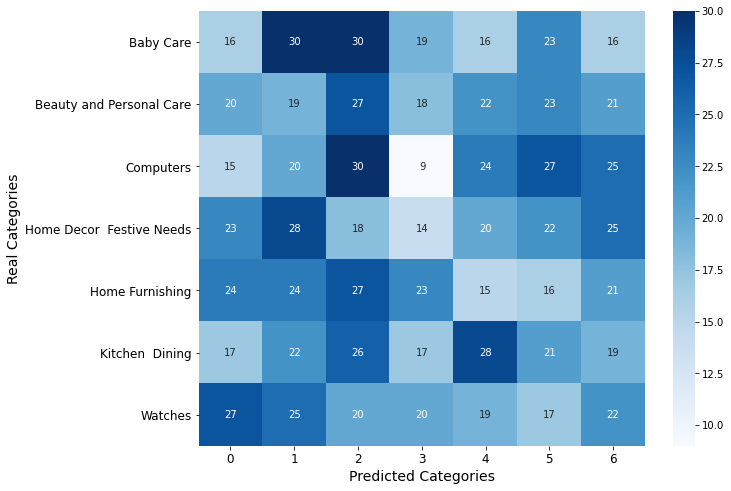

In [56]:
make_conf_heat_ver2(ct_orb)

# CNN Neural Networks

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
from os import listdir

import cv2
import glob 
import tensorflow as tf
import timeit

from keras.models import Model
from keras.layers import Dense,Flatten
from keras.applications import vgg16
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input

# rearrange the dataframe to have it in the same order as we will have the image file names
df_cats_images = pd.DataFrame(added_flip_data).sort_values(by = "uniq_id")
 
# create a df with one column, with all the image file names
files_df = pd.DataFrame(os.listdir("Images/"), columns = ["name"]).sort_values(by = "name")

In [159]:
from umap import UMAP

def my_umap_unsup(tfif_output, n_neighbors, n_components, min_dist):


    my_umap = UMAP(random_state = 456, dens_frac = 0.0, 
                   min_dist = min_dist, n_components = n_components, 
                   n_neighbors = n_neighbors).fit_transform(tfif_output)
    
    #my_umap = tfif_output
    
    return my_umap

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

class DataframeFunctionTransformer():
    
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

## Technique Using VGG 16

In [67]:
fn_imgs_vgg = []

# for each image, resize it and append it to the array fn_imgs

for file in files_df["name"]:
    img = cv2.resize(cv2.imread("Images/" + file), (224, 224))
    fn_imgs_vgg.append([file, img])

# set up the vgg model
base_model_vgg = VGG16(weights = 'imagenet', include_top = True)

base_model_vgg.summary(line_length = 150)

Model: "vgg16"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
input_2 (InputLayer)                                               [(None, 224, 224, 3)]                                       0                      
______________________________________________________________________________________________________________________________________________________
block1_conv1 (Conv2D)                                              (None, 224, 224, 64)                                        1792                   
______________________________________________________________________________________________________________________________________________________
block1_conv2 (Conv2D)                                              (None, 224, 

In [68]:
# use model without the last layer
model_vgg = Model(inputs = base_model_vgg.input, outputs = base_model_vgg.get_layer('fc2').output)

model_vgg.summary(line_length = 150)

Model: "model_1"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
input_2 (InputLayer)                                               [(None, 224, 224, 3)]                                       0                      
______________________________________________________________________________________________________________________________________________________
block1_conv1 (Conv2D)                                              (None, 224, 224, 64)                                        1792                   
______________________________________________________________________________________________________________________________________________________
block1_conv2 (Conv2D)                                              (None, 224

In [69]:
# dimensions for vgg : (1, 224, 224, 3)  
f_vect_vgg = {}

# apply vgg preprocessing for all images and get the predictions from the vgg model
# get the results in a dict, with the image file name as key 
for fn, img in dict(fn_imgs_vgg.copy()).items():
    if img.shape[2] == 1:
        img = img.repeat(3, axis = 2)

    arr4d = np.expand_dims(img, axis = 0) 
    arr4d_pp = tf.keras.applications.vgg16.preprocess_input(arr4d)
    f_vect_vgg[fn] = model_vgg.predict(arr4d_pp)[0,:]

# get a list of all the  for each image
images = list(f_vect_vgg.values())

In [70]:
len(images)

1050

In [71]:
len(images[0])

4096

#### Reduc Dimensions NMF

In [189]:
from sklearn.decomposition import NMF
import sklearn

def reduc_dim_nmf(data):
    
    # we choose 7 topics because of our 7 categories
    model_nmf = NMF(n_components = 7, init = 'random', random_state = 16)
    W_topics = model_nmf.fit_transform(data)
    H_weights = model_nmf.components_
    
    clusters = W_topics.argmax(axis = 1)
    
    return W_topics, clusters

In [ ]:
W_vgg, clusters_vgg = reduc_dim_nmf(images)

In [73]:
W_vgg.shape

(1050, 7)

In [77]:
sklearn.metrics.adjusted_rand_score(df_cats_images["Cat_Level_1"], clusters_vgg)

0.5050958341307282

In [63]:
value = "VGG16 / NMF"
df_table.loc[2, "Images"] = value
df_table.at[2, "ARI Images"] = 0.50
df_table

,Unnamed: 0,Text,ARI Text,Images,ARI Images,Other Models,ARI for other Models
0,0,BoW / Truncated SVD / Kmeans,0.610,NaN,NaN,NaN,NaN
1,1,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94
2,2,USE / PCA / Kmeans,0.680,VGG16 / NMF,0.50,NaN,NaN
3,3,USE / UMAP / Kmeans,0.685,NaN,NaN,NaN,NaN
4,4,LDA,0.380,NaN,NaN,NaN,NaN
5,5,NMF,0.540,NaN,NaN,NaN,NaN


#### Reduc Dimensions ACP

In [20]:
def exp_var_func(model):
    
    var_explained = model.explained_variance_ratio_.sum()
    print(var_explained)

    # Determine explained variance using explained_variance_ration_ attribute
    var_explained_all = model.explained_variance_ratio_

    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    cum_sum_eigenvalues = np.cumsum(var_explained_all)
    
    # Create the visualization plot
    plt.figure(figsize = (10, 6))
    
    plt.bar(range(0,len(var_explained_all)), var_explained_all, alpha = 0.5, align = 'center', 
            label = 'Individual explained variance')
    
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where = 'mid',
             label = 'Cumulative explained variance')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    
    plt.legend(loc = 'best')
    plt.tight_layout()
    plt.show()

0.9531473226549658


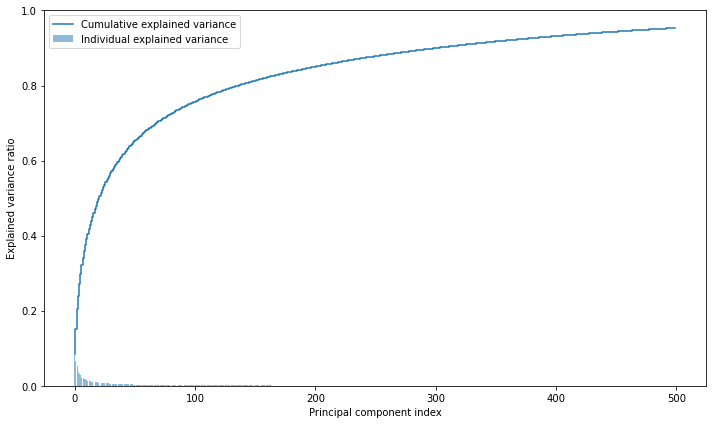

In [270]:
from sklearn.decomposition import PCA

pca_model_one = PCA(n_components = 500)
pca_vgg = pca_model_one.fit_transform(images)

exp_var_func(pca_model_one)

In [273]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

estimators = [('reduce_dim', 'passthrough'),
              ('kmeans', KMeans(n_clusters = 7, random_state = 16))]

pipe_vgg_pca = Pipeline(estimators)

tf_params = [{},
             {'reduce_dim': [PCA(random_state = 16)],
              'reduce_dim__n_components' : (20, 30, 40, 50, 60, 80, 100, 150, 250, 300, 350, 400)}]
            


# Setting up GridSearch 
pca_vgg_grid = GridSearchCV(pipe_vgg_pca, param_grid = tf_params, cv = [(slice(None), slice(None))], 
                              verbose = 4, 
                              scoring = 'adjusted_rand_score', n_jobs = -1, )

# Fitting
pca_vgg_grid.fit(images, df_cats_images["Cat_Level_1"])

Fitting 1 folds for each of 13 candidates, totalling 13 fits


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=Pipeline(steps=[('reduce_dim', 'passthrough'),
                                       ('kmeans',
                                        KMeans(n_clusters=7,
                                               random_state=16))]),
             n_jobs=-1,
             param_grid=[{},
                         {'reduce_dim': [PCA(n_components=350,
                                             random_state=16)],
                          'reduce_dim__n_components': (20, 30, 40, 50, 60, 80,
                                                       100, 150, 250, 300, 350,
                                                       400)}],
             scoring='adjusted_rand_score', verbose=4)

In [274]:
print("Best score: %0.3f" % pca_vgg_grid.best_score_)
print("Best parameters set:")
#pca_vgg_grid.best_estimator_.get_params()

Best score: 0.444
Best parameters set:


In [62]:
value = "VGG16 / PCA"
df_table.loc[1, "Images"] = value
df_table.at[1, "ARI Images"] = 0.44
df_table

,Unnamed: 0,Text,ARI Text,Images,ARI Images,Other Models,ARI for other Models
0,0,BoW / Truncated SVD / Kmeans,0.610,NaN,NaN,NaN,NaN
1,1,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94
2,2,USE / PCA / Kmeans,0.680,NaN,NaN,NaN,NaN
3,3,USE / UMAP / Kmeans,0.685,NaN,NaN,NaN,NaN
4,4,LDA,0.380,NaN,NaN,NaN,NaN
5,5,NMF,0.540,NaN,NaN,NaN,NaN


#### Reduc Dimensions Umap

In [262]:
estimators_umap = [('reduce_dim', FunctionTransformer(func = my_umap_unsup)),
                   ('kmeans', KMeans(n_clusters = 7, random_state = 16))]

pipe_umap_vgg = Pipeline(estimators_umap)

tf_params_umap = {'reduce_dim__kw_args': [{'n_neighbors': (50), 'n_components':(25), 
                                           'min_dist':(0.1)}, 
                                          {'n_neighbors': (100), 'n_components':(25), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (50), 'n_components':(50), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (100), 'n_components':(50), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (50), 'n_components':(25), 
                                           'min_dist':(0.2)}, 
                                          {'n_neighbors': (100), 'n_components':(25), 
                                           'min_dist':(0.2)},
                                          {'n_neighbors': (50), 'n_components':(50), 
                                           'min_dist':(0.2)},
                                          {'n_neighbors': (100), 'n_components':(50), 
                                           'min_dist':(0.2)},
                                          {'n_neighbors': (50), 'n_components':(25), 
                                           'min_dist':(0.5)}, 
                                          {'n_neighbors': (100), 'n_components':(25), 
                                           'min_dist':(0.5)},
                                          {'n_neighbors': (50), 'n_components':(50), 
                                           'min_dist':(0.5)},
                                          {'n_neighbors': (100), 'n_components':(50),
                                           'min_dist':(0.5)},
                                          {'n_neighbors': (150), 'n_components':(25), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (150), 'n_components':(50), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (150), 'n_components':(25), 
                                           'min_dist':(0.2)}, 
                                          {'n_neighbors': (150), 'n_components':(50), 
                                           'min_dist':(0.2)},
                                          {'n_neighbors': (150), 'n_components':(25), 
                                           'min_dist':(0.5)},  
                                          {'n_neighbors': (150), 'n_components':(50),
                                           'min_dist':(0.5)}] }
                  
# Setting up GridSearch for TFIDFVectorizer
umap_vgg_grid = GridSearchCV(pipe_umap_vgg, param_grid = tf_params_umap, cv = [(slice(None), slice(None))], 
                             scoring = 'adjusted_rand_score', n_jobs = -1, verbose = 1, error_score = 'raise')

# Fitting TVC GS
umap_vgg_grid.fit(images, df_cats_images["Cat_Level_1"])

Fitting 1 folds for each of 18 candidates, totalling 18 fits


/opt/anaconda3/envs/myfirstenv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             error_score='raise',
             estimator=Pipeline(steps=[('reduce_dim',
                                        FunctionTransformer(func=<function my_umap_unsup at 0x7ff004ddd700>)),
                                       ('kmeans',
                                        KMeans(n_clusters=7,
                                               random_state=16))]),
             n_jobs=-1,
             param_grid={'reduce_dim__kw_args': [{'min_dist': 0.1,
                                                  'n_components': 25,
                                                  'n_neighbors': 50},
                                                 {'min_dist':...
                                                 {'min_dist': 0.1,
                                                  'n_components': 25,
                                                  'n_neighbors': 150},
                                                

In [264]:
print("Best score: %0.3f" % umap_vgg_grid.best_score_)
print("Best parameters set:")
umap_vgg_grid.best_estimator_.get_params()

Best score: 0.469
Best parameters set:


{'memory': None,
 'steps': [('reduce_dim',
   FunctionTransformer(func=<function my_umap_unsup at 0x7ff004ddd700>,
                       kw_args={'min_dist': 0.1, 'n_components': 50,
                                'n_neighbors': 150})),
  ('kmeans', KMeans(n_clusters=7, random_state=16))],
 'verbose': False,
 'reduce_dim': FunctionTransformer(func=<function my_umap_unsup at 0x7ff004ddd700>,
                     kw_args={'min_dist': 0.1, 'n_components': 50,
                              'n_neighbors': 150}),
 'kmeans': KMeans(n_clusters=7, random_state=16),
 'reduce_dim__accept_sparse': False,
 'reduce_dim__check_inverse': True,
 'reduce_dim__func': <function __main__.my_umap_unsup(tfif_output, n_neighbors, n_components, min_dist)>,
 'reduce_dim__inv_kw_args': None,
 'reduce_dim__inverse_func': None,
 'reduce_dim__kw_args': {'n_neighbors': 150,
  'n_components': 50,
  'min_dist': 0.1},
 'reduce_dim__validate': False,
 'kmeans__algorithm': 'auto',
 'kmeans__copy_x': True,
 'kmeans__ini

In [64]:
value = "VGG16 / UMAP"
df_table.loc[3, "Images"] = value
df_table.at[3, "ARI Images"] = 0.47
df_table

,Unnamed: 0,Text,ARI Text,Images,ARI Images,Other Models,ARI for other Models
0,0,BoW / Truncated SVD / Kmeans,0.610,NaN,NaN,NaN,NaN
1,1,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94
2,2,USE / PCA / Kmeans,0.680,VGG16 / NMF,0.50,NaN,NaN
3,3,USE / UMAP / Kmeans,0.685,VGG16 / UMAP,0.47,NaN,NaN
4,4,LDA,0.380,NaN,NaN,NaN,NaN
5,5,NMF,0.540,NaN,NaN,NaN,NaN


### Visualisations

In [78]:
ct_nmf_vgg = pd.crosstab(df_cats_images["Cat_Level_1"], clusters_vgg)
ct_nmf_vgg.columns = ["0", "1", "2", "3", "4", "5", "6"]
ct_nmf_vgg = ct_nmf_vgg[["6", "0", "5", "3", "4", "1", "2"]]
ct_nmf_vgg

,6,0,5,3,4,1,2
Cat_Level_1,,,,,,,
Baby Care,109,4,4,19,13,1,0
Beauty and Personal Care,9,113,12,10,1,4,1
Computers,1,2,135,9,0,2,1
Home Decor Festive Needs,9,1,9,115,13,0,3
Home Furnishing,78,1,4,2,65,0,0
Kitchen Dining,2,6,10,30,0,101,1
Watches,0,0,13,10,0,1,126


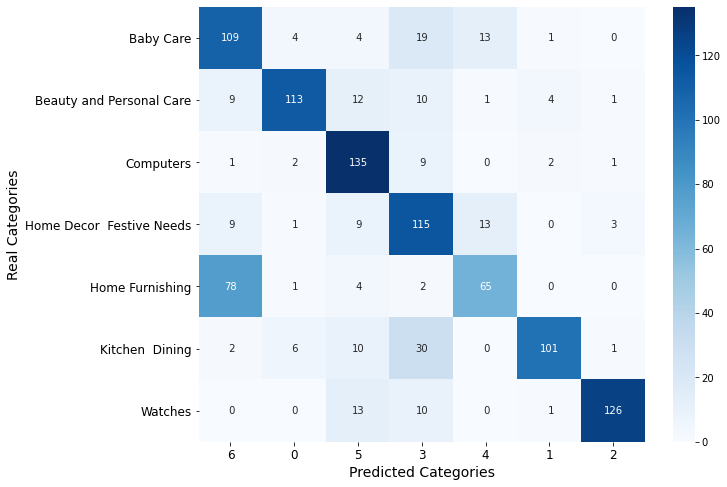

In [79]:
make_conf_heat_ver2(ct_nmf_vgg)

In [81]:
clusters_vgg

array([2, 5, 4, ..., 1, 4, 3])

In [ ]:
tsne_viz(W_vgg, clusters_vgg,
         "class", "T-SNE des données extraites par BOW & NMF")

In [ ]:
pca_viz(W_vgg, "F1 : 24%", "F2 : 18%")

In [236]:
from sklearn.cluster import KMeans

#init='k-means++'
kmeans_vgg = KMeans(n_clusters = 7).fit(pca_vgg)

import sklearn

sklearn.metrics.adjusted_rand_score(df_cats_images["Cat_Level_1"], kmeans_vgg.labels_)

0.394203104068387

## Using ResNet


In [218]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [240]:
fn_imgs_res = []

# for each image, resize it and append it to the array fn_imgs

for file in files_df["name"]:
    img = cv2.resize(cv2.imread("Images/" + file), (224, 224))
    fn_imgs_res.append([file, img])

res_net_model = ResNet50(weights = 'imagenet')

res_net_model.summary(line_length = 150)

Model: "resnet50"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_4 (InputLayer)                             [(None, 224, 224, 3)]            0                                                                   
______________________________________________________________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)                        (None, 230, 230, 3)              0                 input_4[0][0]                                     
______________________________________________________________________________________________________________________________________________________
conv1_conv (Conv2D)                              (None, 112, 112, 64)       

In [220]:
# use model without the last layer
    
model_res = Model(inputs = res_net_model.input, outputs = res_net_model.get_layer("avg_pool").output)
model_res.summary(line_length = 150)

Model: "model_1"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_3 (InputLayer)                             [(None, 224, 224, 3)]            0                                                                   
______________________________________________________________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)                        (None, 230, 230, 3)              0                 input_3[0][0]                                     
______________________________________________________________________________________________________________________________________________________
conv1_conv (Conv2D)                              (None, 112, 112, 64)        

In [221]:
# dimensions for reg : (3, 224, 224)  
f_vect_reg = {}

# apply reg preprocessing for all images and get the predictions from the reg model
# get the results in a dict, with the image file name as key 
for fn, img in dict(fn_imgs_res.copy()).items():
    if img.shape[2] == 1:
        img = img.repeat(3, axis = 2)

    arr4d = np.expand_dims(img, axis = 0) 
    arr4d_pp = tf.keras.applications.resnet50.preprocess_input(arr4d)
    f_vect_reg[fn] = model_res.predict(arr4d_pp)[0,:]

# get a list of all the  for each image
images_reg = list(f_vect_reg.values())

len(images_reg[1])

2048

In [222]:
images_reg = list(f_vect_reg.values())

len(images_reg)


1050

#### Reduc Dimension NMF

In [223]:
W_reg, clusters_reg = reduc_dim_nmf(images_reg)

sklearn.metrics.adjusted_rand_score(df_cats_images["Cat_Level_1"], clusters_reg)

0.4598771022466429

In [224]:
W_reg.shape

(1050, 7)

In [225]:
value = "ResNet50 / NMF"
df_table.loc[5, "Images"] = value
df_table.at[5, "ARI Images"] = 0.46
df_table

,Unnamed: 0,Text,ARI Text,Images,ARI Images,Other Models,ARI for other Models
0,0,BoW / Truncated SVD / Kmeans,0.610,NaN,NaN,NaN,NaN
1,1,BoW / UMAP / Kmeans,0.700,NaN,NaN,Text Classification,0.94
2,2,USE / PCA / Kmeans,0.680,NaN,NaN,NaN,NaN
3,3,USE / UMAP / Kmeans,0.685,NaN,NaN,NaN,NaN
4,4,LDA,0.380,NaN,NaN,NaN,NaN
5,5,NMF,0.540,ResNet50 / NMF,0.46,NaN,NaN


#### Reduc Dimensions ACP

In [ ]:
pca_reg_model = PCA(n_components = 350)
pca_reg = pca_reg_model.fit_transform(images_reg)

exp_var_func(pca_reg_model)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

estimators = [('reduce_dim', 'passthrough'),
              ('kmeans', KMeans(n_clusters = 7, random_state = 16))]

pipe_reg_pca = Pipeline(estimators)

tf_params = [{},
             {'reduce_dim': [PCA(random_state = 16)],
              'reduce_dim__n_components' : (20, 30, 40, 50, 60, 80, 100, 150, 250, 350)}]
            


# Setting up GridSearch 
pca_reg_grid = GridSearchCV(pipe_reg_pca, param_grid = tf_params, cv = [(slice(None), slice(None))], 
                              verbose = 4, 
                              scoring = 'adjusted_rand_score', n_jobs = -1, )

# Fitting
pca_reg_grid.fit(images_reg, df_cats_images["Cat_Level_1"])

In [ ]:
print("Best score: %0.3f" % pca_reg_grid.best_score_)
print("Best parameters set:")
#pca_vgg_grid.best_estimator_.get_params()

In [66]:
value = "ResNet50 / PCA"
df_table.loc[4, "Images"] = value
df_table.at[4, "ARI Images"] = 0.53
df_table

,Unnamed: 0,Text,ARI Text,Images,ARI Images,Other Models,ARI for other Models
0,0,BoW / Truncated SVD / Kmeans,0.610,NaN,NaN,NaN,NaN
1,1,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94
2,2,USE / PCA / Kmeans,0.680,VGG16 / NMF,0.50,NaN,NaN
3,3,USE / UMAP / Kmeans,0.685,VGG16 / UMAP,0.47,NaN,NaN
4,4,LDA,0.380,ResNet50 / PCA,0.53,NaN,NaN
5,5,NMF,0.540,ResNet50 / NMF,0.46,NaN,NaN


In [32]:
# best pipeline found from gridsearch
pca_reg_trans = pca_reg_grid.best_estimator_["reduce_dim"].transform(images_reg)

# concat the category branch variables with the original dataframe
data_pca_for_combo = pd.concat([pd.DataFrame(pca_reg_trans), 
                                    added_flip_data[['Cat_Level_1', 'uniq_id']]], axis = 1)

data_pca_for_combo

,0,1,2,3,4,5,6,7,8,9,...,342,343,344,345,346,347,348,349,Cat_Level_1,uniq_id
0,-2.557794,6.109952,-1.312788,16.024882,6.672394,1.467731,-9.019421,-4.915736,7.348801,6.395811,...,1.449274,-0.674993,1.563289,0.335640,-1.207003,-0.305592,-0.745612,0.145857,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7
1,1.727680,8.360272,1.971142,-5.815746,-5.372078,0.588344,-4.259139,-4.288186,2.872739,5.750999,...,-0.596232,-0.495345,-0.475157,-0.213038,-0.644423,0.698219,0.185336,-0.207957,Baby Care,7b72c92c2f6c40268628ec5f14c6d590
2,-6.583338,-7.502754,9.060787,-4.831977,1.783335,-10.977767,3.257683,2.263596,-1.863343,-8.322840,...,1.379864,-0.410271,-1.419635,0.053698,-0.544896,-0.590106,-0.135423,0.780806,Baby Care,64d5d4a258243731dc7bbb1eef49ad74
3,8.920244,-10.234163,0.967258,4.220150,-0.054324,10.512121,9.627203,-7.510849,2.738925,-2.289389,...,0.237825,-0.149911,-1.005916,0.981391,-0.621610,0.292867,-0.201055,0.274477,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8
4,-5.240858,-1.166468,9.000487,2.605401,2.567664,-6.676590,7.617579,-0.573463,-0.886207,4.651434,...,0.503126,1.249615,-0.739408,0.210459,-0.194584,-0.541961,0.069013,-0.463338,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,12.107706,-4.922759,-8.475651,-14.091793,5.820219,-9.002647,0.736128,-5.719590,4.412282,-2.301740,...,-0.513326,-0.819664,-0.329504,-0.251717,-0.594852,0.820506,1.347349,0.268486,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc
1046,-10.097033,-2.471325,-0.200181,1.396557,15.782462,7.660819,1.666000,6.645517,1.612463,1.525222,...,0.165067,0.676334,0.103370,-1.003232,-0.691919,0.953361,-0.533958,0.748678,Baby Care,fd6cbcc22efb6b761bd564c28928483c
1047,0.981387,-0.126154,-13.812796,-6.958964,-2.626995,0.347274,0.870418,0.127731,-3.046658,2.836718,...,0.941497,0.962132,-0.781798,0.440768,1.303108,-1.440613,-1.043649,-0.325307,Baby Care,5912e037d12774bb73a2048f35a00009
1048,-9.185237,-3.880418,6.134288,-3.329524,9.832585,-2.156811,0.696079,12.006859,-1.383545,-10.829535,...,-0.079782,0.416913,1.894423,0.599966,-0.237225,0.429486,-0.138152,-1.753312,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6


#### Reduc Dimensions Umap

In [166]:
estimators_umap = [('reduce_dim', FunctionTransformer(func = my_umap_unsup)),
                   ('kmeans', KMeans(n_clusters = 7, random_state = 16))]

pipe_umap_reg = Pipeline(estimators_umap)

tf_params_umap = {'reduce_dim__kw_args': [{'n_neighbors': (50), 'n_components':(25), 
                                           'min_dist':(0.1)}, 
                                          {'n_neighbors': (100), 'n_components':(25), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (50), 'n_components':(50), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (100), 'n_components':(50), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (50), 'n_components':(25), 
                                           'min_dist':(0.2)}, 
                                          {'n_neighbors': (100), 'n_components':(25), 
                                           'min_dist':(0.2)},
                                          {'n_neighbors': (50), 'n_components':(50), 
                                           'min_dist':(0.2)},
                                          {'n_neighbors': (100), 'n_components':(50), 
                                           'min_dist':(0.2)},
                                          {'n_neighbors': (50), 'n_components':(25), 
                                           'min_dist':(0.5)}, 
                                          {'n_neighbors': (100), 'n_components':(25), 
                                           'min_dist':(0.5)},
                                          {'n_neighbors': (50), 'n_components':(50), 
                                           'min_dist':(0.5)},
                                          {'n_neighbors': (100), 'n_components':(50),
                                           'min_dist':(0.5)},
                                          {'n_neighbors': (150), 'n_components':(25), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (150), 'n_components':(50), 
                                           'min_dist':(0.1)},
                                          {'n_neighbors': (150), 'n_components':(25), 
                                           'min_dist':(0.2)}, 
                                          {'n_neighbors': (150), 'n_components':(50), 
                                           'min_dist':(0.2)},
                                          {'n_neighbors': (150), 'n_components':(25), 
                                           'min_dist':(0.5)},  
                                          {'n_neighbors': (150), 'n_components':(50),
                                           'min_dist':(0.5)}] }
                  
# Setting up GridSearch for TFIDFVectorizer
umap_reg_grid = GridSearchCV(pipe_umap_reg, param_grid = tf_params_umap, cv = [(slice(None), slice(None))], 
                             scoring = 'adjusted_rand_score', n_jobs = -1, verbose = 1, error_score = 'raise')

# Fitting TVC GS
umap_reg_grid.fit(images_reg, df_cats_images["Cat_Level_1"])

Fitting 1 folds for each of 18 candidates, totalling 18 fits


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             error_score='raise',
             estimator=Pipeline(steps=[('reduce_dim',
                                        FunctionTransformer(func=<function my_umap_unsup at 0x7ff04bcafc10>)),
                                       ('kmeans',
                                        KMeans(n_clusters=7,
                                               random_state=16))]),
             n_jobs=-1,
             param_grid={'reduce_dim__kw_args': [{'min_dist': 0.1,
                                                  'n_components': 25,
                                                  'n_neighbors': 50},
                                                 {'min_dist':...
                                                 {'min_dist': 0.1,
                                                  'n_components': 25,
                                                  'n_neighbors': 150},
                                                

In [167]:
print("Best score: %0.3f" % umap_reg_grid.best_score_)
print("Best parameters set:")
#umap_reg_grid.best_estimator_.get_params()

Best score: 0.564
Best parameters set:


In [217]:
umap_reg_grid.best_estimator_

Pipeline(steps=[('reduce_dim',
                 FunctionTransformer(func=<function my_umap_unsup at 0x7ff04bcafc10>,
                                     kw_args={'min_dist': 0.1,
                                              'n_components': 50,
                                              'n_neighbors': 100})),
                ('kmeans', KMeans(n_clusters=7, random_state=16))])

In [168]:
value = "ResNet50 / UMAP"
df_table.loc[6, "Images"] = value
df_table.at[6, "ARI Images"] = 0.56
df_table

,Unnamed: 0,Text: Methods Used,ARI T,Images: Methods Used,ARI I,Clustering : Images & Text,ARI,Images,ARI Images
0,0.0,BoW / Truncated SVD / Kmeans,0.610,ORB,0.00,Text & Images Combo,0.53,NaN,NaN
1,1.0,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94,NaN,NaN
2,2.0,USE / PCA / Kmeans,0.680,VGG16 / NMF,0.50,Image Classification,0.85,NaN,NaN
3,3.0,USE / UMAP / Kmeans,0.685,VGG16 / UMAP,0.47,Text & Images Combo: NMF,0.53,NaN,NaN
4,4.0,LDA,0.380,ResNet50 / PCA,0.53,Text & Images Combo: ACP,0.42,NaN,NaN
5,5.0,NMF,0.540,ResNet50 / NMF,0.46,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,ResNet50 / UMAP,0.56,NaN,NaN,ResNet50 / UMAP,0.56


In [172]:
# best pipeline found from gridsearch
umap_reg_trans = umap_reg_grid.best_estimator_["reduce_dim"].transform(images_reg)

In [173]:
umap_reg_trans.shape

(1050, 50)

In [174]:
umap_reg_grid.best_estimator_["kmeans"].labels_

array([4, 3, 5, ..., 6, 1, 3], dtype=int32)

### Visualisations

In [280]:
ct_nmf_reg = pd.crosstab(df_cats_images["Cat_Level_1"], umap_reg_grid.best_estimator_["kmeans"].labels_)
ct_nmf_reg.columns = ["0", "1", "2", "3", "4", "5", "6"]
ct_nmf_reg = ct_nmf_reg[["5", "0", "3", "2", "1", "6", "4"]]
ct_nmf_reg

,5,0,3,2,1,6,4
Cat_Level_1,,,,,,,
Baby Care,110,3,6,8,18,4,1
Beauty and Personal Care,6,120,12,5,3,1,3
Computers,1,3,132,0,10,0,4
Home Decor Festive Needs,5,3,5,95,33,4,5
Home Furnishing,79,1,2,2,65,1,0
Kitchen Dining,0,5,21,7,0,117,0
Watches,0,0,1,3,0,0,146


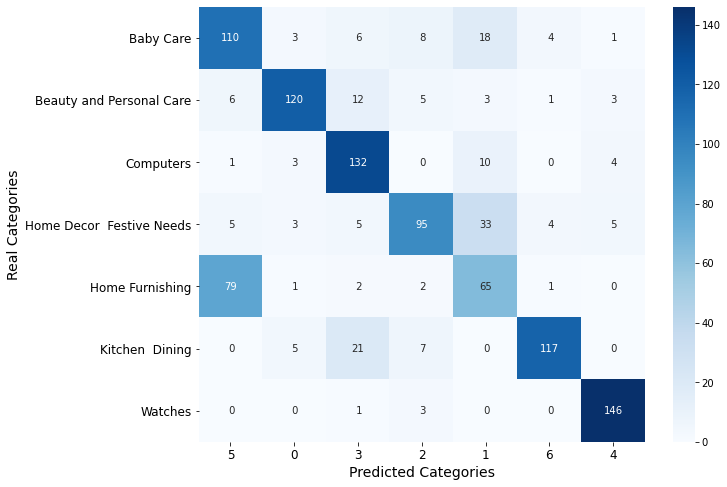

In [281]:
make_conf_heat_ver2(ct_nmf_reg)

In [ ]:
tsne_viz(umap_reg_trans, umap_reg_grid.best_estimator_["kmeans"].labels_,
         "class", "T-SNE des données extraites par BOW & NMF")

In [ ]:
pca_viz(umap_reg_trans, "F1 : 54%", "F2 : 21%")

In [309]:
# concat the category branch variables with the original dataframe
data_from_im_for_combo = pd.concat([pd.DataFrame(umap_reg_trans), 
                                          added_flip_data[['Cat_Level_1', 'uniq_id']]], axis = 1)

data_from_im_for_combo

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,Cat_Level_1,uniq_id
0,9.176733,10.646053,3.166229,8.129428,5.378695,5.543470,4.721687,5.527144,7.857791,7.502542,...,3.643295,4.685214,4.570015,7.723460,4.907362,4.745863,1.392223,5.898190,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7
1,8.132975,10.070825,3.488456,8.239713,4.980316,5.274001,4.600392,5.527931,7.564953,7.860134,...,3.757816,4.587768,4.605040,7.847045,4.870962,4.811415,1.485455,5.732656,Baby Care,7b72c92c2f6c40268628ec5f14c6d590
2,8.976942,10.764649,2.621016,8.320386,5.331937,5.464762,4.424438,5.928113,8.222851,7.597203,...,3.685707,3.506130,4.408744,7.500163,4.876488,5.299461,1.909781,6.394980,Baby Care,64d5d4a258243731dc7bbb1eef49ad74
3,8.091377,9.716610,3.692126,8.392999,4.887940,5.377901,4.959772,5.363659,7.664187,7.897154,...,3.410127,3.953268,4.853015,7.768346,4.953456,5.115385,1.942077,5.794229,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8
4,8.997750,10.360744,3.098273,8.287834,5.325819,5.619256,4.780810,5.502795,7.974137,7.631429,...,3.525810,4.059816,4.725255,7.711493,4.845257,4.922707,1.713436,5.937550,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,7.485750,9.438233,4.156633,8.327991,4.764270,4.842627,4.456549,5.672503,7.431560,7.843168,...,3.916163,4.514989,4.487463,7.659965,5.186100,5.082927,1.629176,5.598669,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc
1046,9.080388,10.357092,2.829843,8.477900,5.514595,5.406780,4.675608,5.755261,8.232854,7.459273,...,3.494757,3.655594,5.057463,7.863756,5.043422,5.282585,2.300744,6.594829,Baby Care,fd6cbcc22efb6b761bd564c28928483c
1047,7.764756,9.834991,3.799345,8.339592,4.924395,4.978063,4.428756,5.711609,7.602251,7.818135,...,3.894731,4.482545,4.520159,7.683895,5.090111,5.008365,1.641872,5.717659,Baby Care,5912e037d12774bb73a2048f35a00009
1048,9.012897,10.239582,2.918701,8.487889,5.450813,5.366636,4.716080,5.688262,8.157266,7.471954,...,3.429112,3.613330,5.064489,7.879813,5.067584,5.323040,2.305270,6.587564,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6


# Classifier 

In [228]:
from sklearn.model_selection import train_test_split

# The first split creates 80% training + validation and 20% test. 
X_train_before, X_test, y_train_before, y_test = train_test_split(umap_reg_trans.copy(), 
                                                                  df_cats_images["Cat_Level_1"].copy(),
                                                                  test_size = 0.25, random_state = 1)

# The second split starts with the 80% training + validation split 
# it assigns 25% of this 80% to the validation split - this size comes from 0.25 X 0.80 = 0.20 (20%). 
# So the validation split is 20%. So, now we have validation and testing at 20% each.

# The training split size is calculated as 75% of the 80% = 0.75 X 0.80 = 0.60 (60%). 
# So, this gives a training split size of 60%. 
#X_train_clas, X_val, y_train_clas, y_val  = train_test_split(X_train_before.copy(), y_train_before.copy(), 
 #                                                            test_size = 0.25, random_state = 1) 

In [229]:
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import FunctionTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

estimators_class = [('reduce_dim', "passthrough"),
                    ('classifier',  AdaBoostClassifier())]

pipe_classify = Pipeline(estimators_class)

tf_params = [{},
            {'reduce_dim': [PCA(random_state = 42)],
             'reduce_dim__n_components' : (20, 40, 45),
             'classifier': [RandomForestClassifier()],
             'classifier__max_depth': [5, 8, 10, 30, 50],
             'classifier__max_features': [2, 4, 6, 8, 10],
             'classifier__n_estimators': [10, 50, 100, 200, 500, 1000]},
            {'classifier': [RandomForestClassifier()],
             'classifier__max_depth': [5, 8, 10, 30, 45],
             'classifier__max_features': [2, 4, 6, 8, 10, 15, 20],
             'classifier__n_estimators': [10, 50, 100, 200, 500, 1000]}]
              

# Setting up GridSearch for TFIDFVectorizer
classif_grid = GridSearchCV(pipe_classify, param_grid = tf_params, cv = 5, verbose = 5, 
                            error_score = "raise", n_jobs = -1)

# Fitting TVC GS
classif_grid.fit(X_train_before, y_train_before)


Fitting 5 folds for each of 661 candidates, totalling 3305 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('reduce_dim', 'passthrough'),
                                       ('classifier', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid=[{},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [5, 8, 10, 30, 50],
                          'classifier__max_features': [2, 4, 6, 8, 10],
                          'classifier__n_estimators': [10, 50, 100, 200, 500,
                                                       1000],
                          'reduce_dim': [PCA(random_state=42)],
                          'reduce_dim__n_components': (20, 40, 45)},
                         {'classifier': [RandomForestClassifier(max_depth=10,
                                                                max_features=8,
                                                                n_estimators=200)],
                          'class

In [230]:
print("Best score: %0.3f" % classif_grid.best_score_)
print("Best parameters set:")
classif_grid.best_estimator_.get_params()

Best score: 0.850
Best parameters set:


{'memory': None,
 'steps': [('reduce_dim', 'passthrough'),
  ('classifier',
   RandomForestClassifier(max_depth=10, max_features=8, n_estimators=200))],
 'verbose': False,
 'reduce_dim': 'passthrough',
 'classifier': RandomForestClassifier(max_depth=10, max_features=8, n_estimators=200),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': 10,
 'classifier__max_features': 8,
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_impurity_split': None,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 200,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [234]:
classif_grid.best_estimator_

Pipeline(steps=[('reduce_dim', 'passthrough'),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=8,
                                        n_estimators=200))])

In [235]:
y_pred_classif = classif_grid.best_estimator_.predict(X_test)

In [236]:
sklearn.metrics.adjusted_rand_score(y_test, y_pred_classif)

0.674965659859089

In [237]:
ct_ima_class = pd.crosstab(y_test, y_pred_classif)
#ct_ima_class.columns = ["0", "1", "2", "3", "4", "5", "6"]
#ct_nmf_reg = ct_nmf_reg[["5", "0", "3", "2", "1", "6", "4"]]
ct_ima_class

col_0,Baby Care,Beauty and Personal Care,Computers,Home Decor Festive Needs,Home Furnishing,Kitchen Dining,Watches
Cat_Level_1,,,,,,,
Baby Care,26,2,2,3,4,1,1
Beauty and Personal Care,1,26,0,3,3,0,0
Computers,0,2,43,2,0,3,0
Home Decor Festive Needs,1,0,1,25,0,3,3
Home Furnishing,1,0,2,1,35,0,0
Kitchen Dining,0,1,1,0,0,37,0
Watches,0,0,0,0,0,0,30


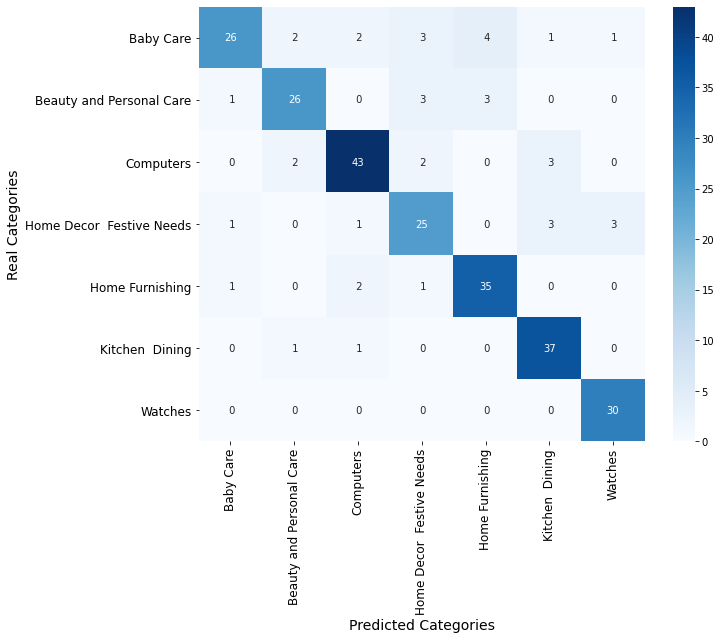

In [238]:
make_conf_heat_ver2(ct_ima_class)

In [81]:
df_table

,Unnamed: 0,Text,ARI Text,Images,ARI Images,Other Models,ARI for other Models
0,0.0,Bow / Truncated SVD / Kmeans,0.610,NaN,NaN,NaN,NaN
1,1.0,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94
2,2.0,USE / PCA / Kmeans,0.680,VGG16 / NMF,0.50,NaN,NaN
3,3.0,USE / UMAP / Kmeans,0.685,VGG16 / UMAP,0.47,NaN,NaN
4,4.0,LDA,0.380,ResNet50 / PCA,0.53,NaN,NaN
5,5.0,NMF,0.540,ResNet50 / NMF,0.46,NaN,NaN
6,NaN,NaN,NaN,ResNet50 / UMAP,0.56,NaN,NaN


In [68]:
value = "Image Classification"
df_table.loc[2, "Other Models"] = value
df_table.at[2, "ARI for other Models"] = 0.85
df_table

,Unnamed: 0,Text,ARI Text,Images,ARI Images,Other Models,ARI for other Models
0,0.0,BoW / Truncated SVD / Kmeans,0.610,NaN,NaN,NaN,NaN
1,1.0,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94
2,2.0,USE / PCA / Kmeans,0.680,VGG16 / NMF,0.50,Image Classification,0.85
3,3.0,USE / UMAP / Kmeans,0.685,VGG16 / UMAP,0.47,NaN,NaN
4,4.0,LDA,0.380,ResNet50 / PCA,0.53,NaN,NaN
5,5.0,NMF,0.540,ResNet50 / NMF,0.46,NaN,NaN
6,NaN,NaN,NaN,ResNet50 / UMAP,0.56,NaN,NaN


# Ultimate Combo for Clustering
## UMAP Combos

From Text

In [330]:
umap_text_for_combo = pd.read_csv('umap_text_for_combo.csv')

In [333]:
#data_for_combo_from_text = data_for_combo_from_text.iloc[:,1:]

In [334]:
data_for_combo_from_text = umap_text_for_combo.iloc[:,1:]

In [335]:
data_for_combo_from_text

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Cat_Level_1,uniq_id
0,-3.068007,6.734042,4.713988,2.951059,5.047790,3.659130,9.576347,6.151416,8.254123,4.440138,...,7.462518,5.784084,2.036793,3.911943,5.569926,8.793872,2.514538,6.836587,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7
1,-2.659051,7.389989,4.448887,3.347870,5.007461,3.928745,9.946771,6.193932,7.838971,3.970544,...,6.772967,6.150175,2.287221,3.506569,5.446858,8.505318,2.526573,6.936763,Baby Care,7b72c92c2f6c40268628ec5f14c6d590
2,-2.754865,7.378664,4.416904,3.400483,5.009785,3.859021,9.868029,6.115379,7.883052,4.090332,...,6.809371,6.219909,2.235869,3.563711,5.340668,8.489585,2.583519,6.827200,Baby Care,64d5d4a258243731dc7bbb1eef49ad74
3,-3.212784,7.168476,4.487324,3.384445,4.738995,3.750236,9.638836,6.203914,8.021289,4.428758,...,7.022392,5.995058,2.193023,3.859246,5.385129,8.495297,2.721095,6.803616,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8
4,-3.212575,7.151557,4.506849,3.352796,4.746778,3.755406,9.655414,6.209346,8.016806,4.431080,...,7.069066,5.977114,2.204326,3.862515,5.401092,8.505850,2.688542,6.821802,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-3.271690,5.329323,4.851723,2.280478,5.779231,3.537299,8.806228,6.032290,8.367862,4.801259,...,8.556968,5.068153,1.822309,4.147908,5.795269,8.955712,1.702683,6.719447,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc
1046,-3.301979,5.277600,4.892327,2.224486,5.781743,3.545512,8.806474,6.038455,8.406203,4.815972,...,8.613353,5.025765,1.782733,4.185268,5.810714,8.974902,1.678894,6.692422,Baby Care,fd6cbcc22efb6b761bd564c28928483c
1047,-3.387015,5.190655,4.912713,2.202583,5.794130,3.502476,8.618825,6.021864,8.384735,4.865756,...,8.805085,4.968281,1.783879,4.183667,5.784174,8.924389,1.588877,6.703061,Baby Care,5912e037d12774bb73a2048f35a00009
1048,-3.320967,5.205462,4.908498,2.208167,5.807636,3.537998,8.728224,6.020189,8.400219,4.831142,...,8.686947,4.998774,1.768548,4.176063,5.799766,8.952250,1.644038,6.697491,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6


From Images

In [336]:
merged_dims_combo = data_from_im_for_combo.merge(data_for_combo_from_text, how = "outer", on = 'uniq_id')

In [337]:
merged_combo_red = merged_dims_combo.drop(["Cat_Level_1_x", "Cat_Level_1_y", "uniq_id"], axis = 1)

In [338]:
kmeans_combo = KMeans(n_clusters = 7).fit(merged_combo_red)

sklearn.metrics.adjusted_rand_score(merged_dims_combo["Cat_Level_1_x"], kmeans_combo.labels_)

0.5325008451909101

In [99]:
df_table

,Unnamed: 0,Text: Methods Used,ARI T,Images: Methods Used,ARI I,Supervised Classification,ARI
0,0.0,BoW / Truncated SVD / Kmeans,0.610,ORB,0.00,Text & Images Combo,0.53
1,1.0,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94
2,2.0,USE / PCA / Kmeans,0.680,VGG16 / NMF,0.50,Image Classification,0.85
3,3.0,USE / UMAP / Kmeans,0.685,VGG16 / UMAP,0.47,NaN,NaN
4,4.0,LDA,0.380,ResNet50 / PCA,0.53,NaN,NaN
5,5.0,NMF,0.540,ResNet50 / NMF,0.46,NaN,NaN
6,NaN,NaN,NaN,ResNet50 / UMAP,0.56,NaN,NaN


In [104]:
value = "Text & Images Combo: NMF"
df_table.loc[3, "Supervised Classification"] = value
df_table.at[3, "ARI"] = 0.53
df_table

,Unnamed: 0,Text: Methods Used,ARI T,Images: Methods Used,ARI I,Supervised Classification,ARI
0,0.0,BoW / Truncated SVD / Kmeans,0.610,ORB,0.00,Text & Images Combo,0.53
1,1.0,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94
2,2.0,USE / PCA / Kmeans,0.680,VGG16 / NMF,0.50,Image Classification,0.85
3,3.0,USE / UMAP / Kmeans,0.685,VGG16 / UMAP,0.47,Text & Images Combo: NMF,0.53
4,4.0,LDA,0.380,ResNet50 / PCA,0.53,Text & Images Combo: ACP,0.42
5,5.0,NMF,0.540,ResNet50 / NMF,0.46,NaN,NaN
6,NaN,NaN,NaN,ResNet50 / UMAP,0.56,NaN,NaN


In [339]:
pd.crosstab(merged_dims_combo["Cat_Level_1_y"], kmeans_combo.labels_)

col_0,0,1,2,3,4,5,6
Cat_Level_1_y,,,,,,,
Baby Care,73,14,0,4,52,0,7
Beauty and Personal Care,1,8,0,133,1,3,4
Computers,0,0,0,11,0,107,32
Home Decor Festive Needs,0,112,0,1,0,4,33
Home Furnishing,89,0,0,0,61,0,0
Kitchen Dining,0,108,0,6,0,3,33
Watches,0,0,149,0,0,1,0


In [342]:
ct_nmf_reg = pd.crosstab(merged_dims_combo["Cat_Level_1_x"], kmeans_combo.labels_)
ct_nmf_reg.columns = ["0", "1", "2", "3", "4", "5", "6"]
ct_nmf_reg = ct_nmf_reg[["0", "3", "5", "1", "4", "6", "2"]]
ct_nmf_reg

,0,3,5,1,4,6,2
Cat_Level_1_x,,,,,,,
Baby Care,73,4,0,14,52,7,0
Beauty and Personal Care,1,133,3,8,1,4,0
Computers,0,11,107,0,0,32,0
Home Decor Festive Needs,0,1,4,112,0,33,0
Home Furnishing,89,0,0,0,61,0,0
Kitchen Dining,0,6,3,108,0,33,0
Watches,0,0,1,0,0,0,149


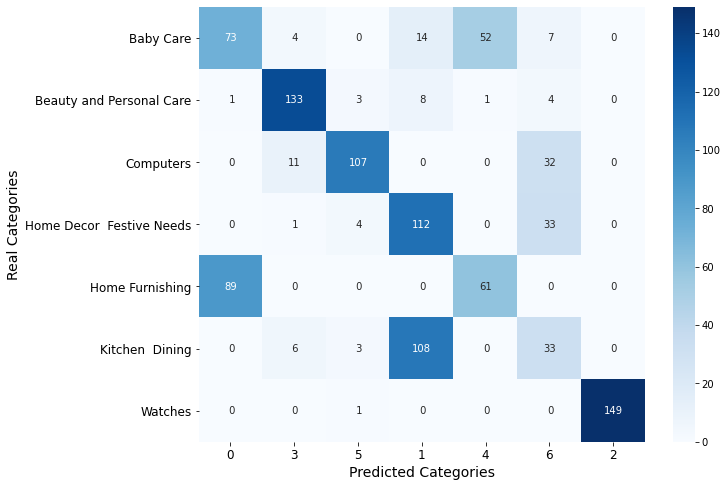

In [343]:
make_conf_heat_ver2(ct_nmf_reg)

## PCA Combos

In [318]:
pca_text_for_combo = pd.read_csv('pca_text_for_combo.csv')

In [319]:
data_for_combo_from_text = pca_text_for_combo.iloc[:,1:]

In [320]:
merged_dims_combo = data_pca_for_combo.merge(data_for_combo_from_text, how = "outer", on = 'uniq_id')
merged_combo_red = merged_dims_combo.drop(["Cat_Level_1_x", "Cat_Level_1_y", "uniq_id"], axis = 1)

In [321]:
kmeans_combo = KMeans(n_clusters = 7).fit(merged_combo_red)

sklearn.metrics.adjusted_rand_score(df_cats_images["Cat_Level_1"], kmeans_combo.labels_)

0.42400841712824866

In [103]:
df_table

,Unnamed: 0,Text: Methods Used,ARI T,Images: Methods Used,ARI I,Supervised Classification,ARI
0,0.0,BoW / Truncated SVD / Kmeans,0.610,ORB,0.00,Text & Images Combo,0.53
1,1.0,BoW / UMAP / Kmeans,0.700,VGG16 / PCA,0.44,Text Classification,0.94
2,2.0,USE / PCA / Kmeans,0.680,VGG16 / NMF,0.50,Image Classification,0.85
3,3.0,USE / UMAP / Kmeans,0.685,VGG16 / UMAP,0.47,Text & Images Combo,0.53
4,4.0,LDA,0.380,ResNet50 / PCA,0.53,Text & Images Combo: ACP,0.42
5,5.0,NMF,0.540,ResNet50 / NMF,0.46,NaN,NaN
6,NaN,NaN,NaN,ResNet50 / UMAP,0.56,NaN,NaN


In [102]:
value = "Text & Images Combo: ACP"
df_table.loc[4, "Supervised Classification"] = value
df_table.at[4, "ARI"] = 0.42


# Summary Table of Scores

In [241]:
df_table

,Unnamed: 0,Text,ARI Text,Images,ARI Images,Other Models,ARI for other Models
0,0,BoW / Truncated SVD / Kmeans,0.610,NaN,NaN,NaN,NaN
1,1,BoW / UMAP / Kmeans,0.700,NaN,NaN,Text Classification,0.94
2,2,USE / PCA / Kmeans,0.680,NaN,NaN,NaN,NaN
3,3,USE / UMAP / Kmeans,0.685,NaN,NaN,NaN,NaN
4,4,LDA,0.380,NaN,NaN,NaN,NaN
5,5,NMF,0.540,ResNet50 / NMF,0.46,NaN,NaN


In [75]:
value = "ORB"
df_table.loc[0, "Images"] = value
df_table.at[0, "ARI"] = 0.00

In [106]:
df_table.columns = ['Unnamed: 0', 'Text: Methods Used', 'ARI T', 'Images: Methods Used', 'ARI I',
                    'Clustering : Images & Text', 'ARI']

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_table.iloc[:,5:7].columns),
                fill_color='coral',
                align='left'),
    cells=dict(values=[df_table.loc[3:4,"Clustering : Images & Text"], df_table.loc[3:4,"ARI"]],
               fill_color='cornsilk',
               align='left'))
])

fig.update_layout(width=800, height= 700)

fig.show()
